# Hypothese 2: Video’s met een hoger aantal comments, vertonen een significante hoger aantal views.

Om de correlatie tussen het aantal comments en het aantal views te analyseren, wordt Spearman’s rangcorrelatiecoëfficiënt berekend. Deze test is geschikt voor niet-lineaire relaties en kleine steekproeven. Een scatterplot met een regressielijn wordt gebruikt om eventuele visuele trends te verkennen. Verwacht wordt dat een positieve correlatie tussen comments en views zichtbaar zal zijn, wat eerder onderzoek naar user engagement ondersteunt.

## Stap 1: Klaarzetten van de notebook.

In deze stap worden alle nodige libraries en data ingeladen en klaargezet.<br>
Dit vereenvoudigt het verdere verloop van de notebook.

In [1]:
# Importeer standaard libraries
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import pandas as pd

In [2]:
# Importeer de data
videos = pd.read_excel('../output/videos.xlsx')

## Stap 2: Uitvoeren van de verschillende analyses

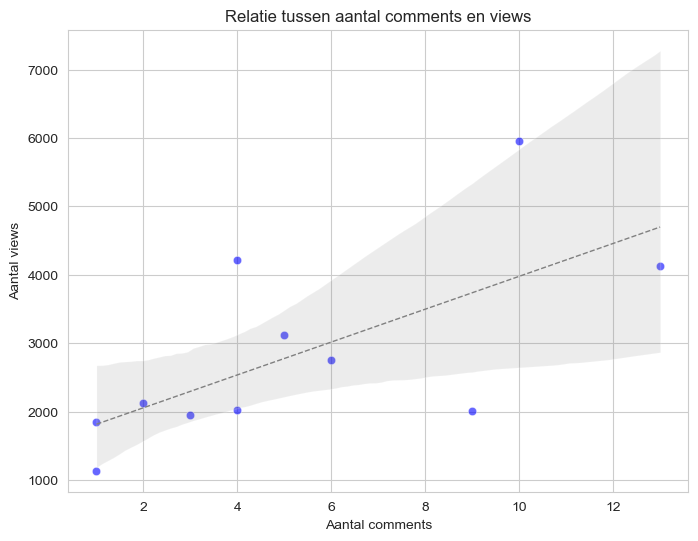

In [3]:
# Scatterplot met regressielijn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=videos['comments'], y=videos['views'], color='blue', alpha=0.6)
sns.regplot(x=videos['comments'], y=videos['views'], scatter=False, color='gray', line_kws={'linestyle': 'dashed', 'linewidth': 1})
plt.title("Relatie tussen aantal comments en views")
plt.xlabel("Aantal comments")
plt.ylabel("Aantal views")
plt.show()

In [4]:
# Spearman's rangcorrelatiecoëfficiënt
correlation, p_value = stats.spearmanr(videos['comments'], videos['views'])
print(f"Spearman correlatie: {correlation}, p-waarde: {p_value}")

Spearman correlatie: 0.7123361933644681, p-waarde: 0.013907801541730713


Een correlatie van 0.712 wijst op een sterk positieve correlatie. Gecombineerd met een p-waarde van 0.014 (<0.05) kan gesteld worden dat dit een statistisch significant is.
H2 wordt dus ondersteund.

             views     likes  dislikes  comments
views     1.000000  0.890909 -0.009941  0.712336
likes     0.890909  1.000000 -0.283305  0.748866
dislikes -0.009941 -0.283305  1.000000 -0.027462
comments  0.712336  0.748866 -0.027462  1.000000


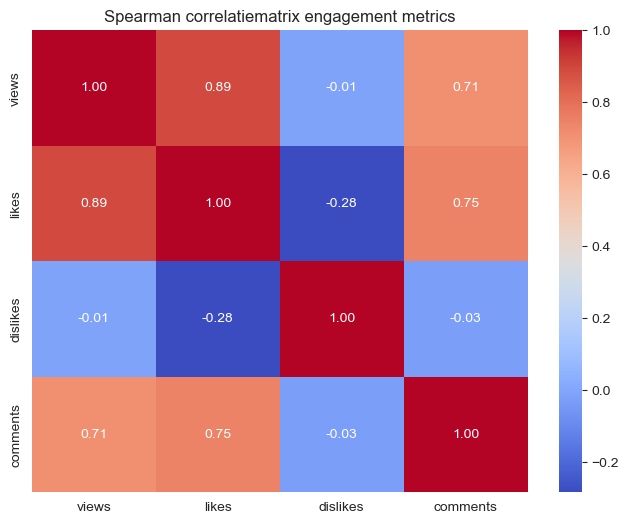

In [5]:
# Correlatiematrix
metrics = ['views', 'likes', 'dislikes', 'comments']
correlation_matrix = videos[metrics].corr(method='spearman')
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman correlatiematrix engagement metrics")
plt.show()

Sterke positieve correlaties:
- Views ↔ Likes (0.89) → Video’s met meer views krijgen significant meer likes. Dit wijst erop dat populairdere video’s ook meer waardering krijgen.
- Likes ↔ Comments (0.75)→ Video’s met meer likes krijgen ook meer comments. Dit kan betekenen dat video’s die gewaardeerd worden ook vaker tot interactie leiden.
- Views ↔ Comments (0.71)→ Video’s met meer comments hebben ook meer views (zoals eerder aangetoond bij Hypothese 2).

Zwakke of negatieve correlaties:
- Dislikes ↔ Likes (-0.28) → Een lichte negatieve correlatie tussen dislikes en likes. Dit betekent dat video’s die veel likes krijgen meestal niet veel dislikes hebben, maar dit effect is niet heel sterk.
- Dislikes ↔ Comments (-0.03) → Bijna geen correlatie tussen dislikes en comments. Dit betekent dat een hoog aantal dislikes niet per se samenhangt met hoeveel mensen reageren op een video.
- Views ↔ Dislikes (-0.009) → Geen significant verband tussen het aantal views en het aantal dislikes. Dit betekent dat populairdere video’s niet per se meer of minder dislikes krijgen.

In [6]:
# Regressie analyse: comments als voorspeller van views
X = videos[['comments']]  # Onafhankelijke variabele
X = sm.add_constant(X)  # Intercept toevoegen
Y = videos['views']  # Afhankelijke variabele

model = sm.OLS(Y, X).fit()
model.summary()

/opt/homebrew/anaconda3/envs/vub/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     7.135
Date:                Mon, 10 Mar 2025   Prob (F-statistic):             0.0256
Time:                        07:43:53   Log-Likelihood:                -91.631
No. Observations:                  11   AIC:                             187.3
Df Residuals:                       9   BIC:                             188.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1575.7634    580.225      2.716      0.024     263.204    2888.323
comments     240.1828     89.921      2.671      0.026      36.768     443.598
==============================================================================
Omnibus:                        1.676   Durbin-Watson:                   2.292
Prob(Omnibus):                  0.433   Jarque-Bera (JB):                0.643
Skew:                           0.591   Prob(JB):                        0.725
Kurtosis:                       2.917   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. Belangrijkste Waarden
    - R² = 0.443 → 44.3% van de variantie in views wordt verklaard door het aantal comments.
    - Ad. R² = 0.381 → Gecorrigeerde R² is iets lager, wat normaal is bij kleine datasets.
    - p-waarde (comments) = 0.025 → Statistisch significant (p < 0.05), dus het effect van comments op views is niet toevallig.
    - Regressiecoëfficiënt voor comments = 240.0024 → Elke extra comment wordt geassocieerd met 240 extra views (gemiddeld).

2. Is Dit Betrouwbaar? (Kleine Steekproefgrootte)

Slechts 11 observaties, wat enkele beperkingen met zich meebrengt:
- Kans op overfitting: Met weinig datapunten kan een model goed passen op de beschikbare data, maar generaliseren naar nieuwe data is onzeker.
- Statistische betrouwbaarheid: Regressiemodellen presteren beter met minstens 30 observaties.
- Verdelingsproblemen: Kleine steekproeven kunnen outliers hebben die het model sterk beïnvloeden.

Hoe de betrouwbaarheid verbeteren?
- Meer data verzamelen → Dit is de beste optie.
- Bootstrap-resampling → Simuleren van extra data uit de bestaande dataset.
- Robuuste regressiemethoden → Bijvoorbeeld Theil-Sen regressie of LASSO-regressie.

3. Conclusie

Het model suggereert dat comments een significante voorspeller zijn van views (p = 0.025),
maar door de kleine steekproef moeten de resultaten voorzichtig geïnterpreteerd worden.

In [7]:
# Regressie analyse: views als voorspeller van comments
X = videos[['views']]  # Onafhankelijke variabele
X = sm.add_constant(X)  # Intercept toevoegen
Y = videos['comments']  # Afhankelijke variabele

model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               comments   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     7.135
Date:                Mon, 10 Mar 2025   Prob (F-statistic):             0.0256
Time:                        07:43:53   Log-Likelihood:                -26.847
No. Observations:                  11   AIC:                             57.69
Df Residuals:                       9   BIC:                             58.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0401      2.167      0.019      0.9

/opt/homebrew/anaconda3/envs/vub/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


Ook hier volgen gelijkaardige conclusies als bij de vorige regressieanalyse --> logisch, gezien de sterke correlatie tussen views en comments.
Dit wil echter ook zeggen dat er duidelijke indicatie is van causatie.